In [57]:
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [58]:
#reference new csv
file="clean_data.csv"
df=pd.read_csv(file)

df=df.drop(columns="Unnamed: 0")


In [59]:
countries_df=df[["Title", "Country", "Language", "Rating"]]
#fix error by converting Country to string
countries_df['Country'] = countries_df['Country'].astype(str)

countries_df

C:\Users\Rachel\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Title,Country,Language,Rating
0,Avatar,USA,English,PG-13
1,Pirates of the Caribbean: At World's End,USA,English,PG-13
2,Spectre,UK,English,PG-13
3,The Dark Knight Rises,USA,English,PG-13
4,John Carter,USA,English,PG-13
...,...,...,...,...
3811,Primer,USA,English,PG-13
3812,Cavite,Philippines,English,Not Rated
3813,El Mariachi,USA,Spanish,R
3814,Newlyweds,USA,English,Not Rated


In [60]:
countries_df.drop_duplicates(subset="Title", keep="first")


,Title,Country,Language,Rating
0,Avatar,USA,English,PG-13
1,Pirates of the Caribbean: At World's End,USA,English,PG-13
2,Spectre,UK,English,PG-13
3,The Dark Knight Rises,USA,English,PG-13
4,John Carter,USA,English,PG-13
...,...,...,...,...
3811,Primer,USA,English,PG-13
3812,Cavite,Philippines,English,Not Rated
3813,El Mariachi,USA,Spanish,R
3814,Newlyweds,USA,English,Not Rated


In [69]:
country_groupby_df=countries_df.groupby("Country").count()
country_groupby_df.head(5)
country_groupby_df = country_groupby_df[country_groupby_df.title != 1]
country_groupby_df

AttributeError: 'DataFrame' object has no attribute 'title'

In [ ]:
countries=country_groupby_df.index
count=country_groupby_df["Title"]

plt.pie(count, labels=countries, autopct='%1.1f%%', shadow=True)

In [62]:
country_groupby_df=country_groupby_df.sort_values(by="Title", ascending=False)
#Remove USA and UK to see rest of world data
rest_of_world_df=country_groupby_df.drop(['USA',"UK"])
rest_of_world_df

,Title,Language,Rating
Country,,,
France,103,103,103
Germany,80,80,80
Canada,60,60,60
Australia,40,40,40
Spain,21,21,21
Japan,15,15,15
China,14,14,14
Hong Kong,13,13,13
Italy,11,11,11


In [64]:
least_rep_df=countries_df[(countries_df["Country"]=="Peru")|(countries_df["Country"]=="Afghanistan")|
                         (countries_df["Country"]=="Poland")| (countries_df["Country"]=="Indonesia")|
                         (countries_df["Country"]=="Philippines")|(countries_df["Country"]=="Iceland")|
                         (countries_df["Country"]=="Greece")|(countries_df["Country"]=="Iceland")|
                          (countries_df["Country"]=="Finland")|(countries_df["Country"]=="Georgia")|
                          (countries_df["Country"]=="Colombia")|(countries_df["Country"]=="Chile")|
                         (countries_df["Country"]=="Belgium")|(countries_df["Country"]=="Aruba")|
                          (countries_df["Country"]=="West Germany")]
least_rep_df.groupby("Country").count()

,Title,Language,Rating
Country,,,
Afghanistan,1,1,1
Aruba,1,1,1
Belgium,1,1,1
Chile,1,1,1
Colombia,1,1,1
Finland,1,1,1
Georgia,1,1,1
Greece,1,1,1
Iceland,1,1,1


In [66]:
least_rep_df=least_rep_df.groupby("Country").count()

([<matplotlib.patches.Wedge at 0x1947305ec50>,
 [Text(1.0724207009445805, 0.24477303810986792, 'Afghanistan'),
  Text(0.8600146100749843, 0.6858388079261577, 'Aruba'),
  Text(0.4772720633202388, 0.9910657786312885, 'Belgium'),
  Text(-7.724207446916536e-08, 1.0999999999999974, 'Chile'),
  Text(-0.47727220250564617, 0.9910657116031256, 'Colombia'),
  Text(-0.860014706394271, 0.6858386871455824, 'Finland'),
  Text(-1.0724207353205286, 0.24477288749895718, 'Georgia'),
  Text(-1.0724206665686113, -0.24477318872077405, 'Greece'),
  Text(-0.8600145137556806, -0.6858389287067194, 'Iceland'),
  Text(-0.47727192413482145, -0.9910658456594321, 'Indonesia'),
  Text(2.317262231632455e-07, -1.0999999999999757, 'Peru'),
  Text(0.4772723416910442, -0.9910656445749431, 'Philippines'),
  Text(0.8600148027135406, -0.6858385663649939, 'Poland'),
  Text(1.0724207696964556, -0.244772736888041, 'West Germany')],
 [Text(0.5849567459697711, 0.13351256624174612, '7.1%'),
  Text(0.4690988782227186, 0.3740938952

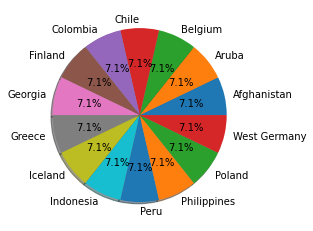

In [67]:
##Least represented countries

countries=least_rep_df.index
count=least_rep_df["Title"]

plt.pie(count, labels=countries, autopct='%1.1f%%', shadow=True)

In [ ]:
#but first, a pie chart:
country=countries_df["Country"]
plt.pie(country)
plt.show()

In [ ]:
countries_df